In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import plotly as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
walmart = pd.read_csv("SRC_projects/Walmart_Store_sales.csv")

In [3]:
print("Number of rows : {}".format(walmart.shape[0]))
print()

print("Display of dataset: ")
display(walmart.head())
print()

#print("Basics statistics: ")
#walmart_desc = walmart.describe(include='all')
#display(walmart_desc)
#print()

print("Percentage of missing values: ")
display(100*walmart.isnull().sum()/walmart.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [4]:
walmart['Store'] = walmart['Store'].astype('int') 
walmart = walmart.drop('Date', axis=1)
walmart = walmart.drop('Holiday_Flag', axis=1)

In [5]:
walmart.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6,1572117.54,59.61,3.045,214.777523,6.858
1,13,1807545.43,42.38,3.435,128.616064,7.470
2,17,NaN,NaN,NaN,130.719581,5.936
3,11,1244390.03,84.57,NaN,214.556497,7.346
4,6,1644470.66,78.89,2.759,212.412888,7.092


In [6]:
walmart.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,91.650000,4.193000,226.968844,14.313000


In [7]:
walmart.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6,1572117.54,59.61,3.045,214.777523,6.858
1,13,1807545.43,42.38,3.435,128.616064,7.470
2,17,NaN,NaN,NaN,130.719581,5.936
3,11,1244390.03,84.57,NaN,214.556497,7.346
4,6,1644470.66,78.89,2.759,212.412888,7.092


In [8]:
walmart = walmart.dropna()

In [9]:
display(walmart.head())
display(100*walmart.isnull().sum()/walmart.shape[0])

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6,1572117.54,59.61,3.045,214.777523,6.858
1,13,1807545.43,42.38,3.435,128.616064,7.470
4,6,1644470.66,78.89,2.759,212.412888,7.092
6,15,695396.19,69.80,4.069,134.855161,7.658
7,20,2203523.20,39.93,3.617,213.023622,6.961


Store           0.0
Weekly_Sales    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [10]:
temp_rows_del = []
for index, value in walmart['Temperature'].items():
    if value < 32:
        temp_rows_del.append(index)

walmart = walmart.drop(temp_rows_del, axis=0)

unemp_rows_del = []
for index, value in walmart['Unemployment'].items():
    if value > 10:
        unemp_rows_del.append(index)
        
walmart = walmart.drop(unemp_rows_del, axis=0)

cpi_rows_del = []
for index, value in walmart['CPI'].items():
    if value > 180 and value < 200:
        cpi_rows_del.append(index)
        
walmart = walmart.drop(cpi_rows_del, axis=0)

In [11]:
walmart.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6,1572117.54,59.61,3.045,214.777523,6.858
1,13,1807545.43,42.38,3.435,128.616064,7.470
4,6,1644470.66,78.89,2.759,212.412888,7.092
6,15,695396.19,69.80,4.069,134.855161,7.658
7,20,2203523.20,39.93,3.617,213.023622,6.961


In [12]:
walmart.columns = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']

In [13]:
cat_features = ['Store']
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [14]:
walmart.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,6,1572117.54,59.61,3.045,214.777523,6.858
1,13,1807545.43,42.38,3.435,128.616064,7.470
4,6,1644470.66,78.89,2.759,212.412888,7.092
6,15,695396.19,69.80,4.069,134.855161,7.658
7,20,2203523.20,39.93,3.617,213.023622,6.961


In [15]:
for x in walmart.columns:
    print(x, walmart[x].dtype)

Store int64
Temperature float64
Fuel_Price float64
CPI float64
Unemployment float64
Weekly_Sales float64


In [16]:
X = walmart.iloc[:, :-1]
y = walmart['Weekly_Sales']

In [17]:
X.shape, y.shape

((74, 5), (74,))

In [18]:
display(X)
display(y)

,Store,Temperature,Fuel_Price,CPI,Unemployment
0,6,1572117.54,59.61,3.045,214.777523
1,13,1807545.43,42.38,3.435,128.616064
4,6,1644470.66,78.89,2.759,212.412888
6,15,695396.19,69.80,4.069,134.855161
7,20,2203523.20,39.93,3.617,213.023622
...,...,...,...,...,...
137,10,1831676.03,88.44,3.112,126.128355
138,6,1639358.93,74.24,3.807,217.014694
143,3,396968.80,78.53,2.705,214.495838
144,3,424513.08,73.44,3.594,226.968844


0      6.858
1      7.470
4      7.092
6      7.658
7      6.961
       ...  
137    9.199
138    6.855
143    7.343
144    6.034
149    8.150
Name: Weekly_Sales, Length: 74, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59, 5), (59,), (15, 5), (15,))

In [21]:
numeric_features = [1,2,3,4]
cateforical_features = [0]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cateforical_features)
])

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print("Score sur le train set:", model.score(X_train, y_train))
print("Score sur le train set:", model.score(X_test, y_test))


Score sur le train set: 0.8687204243881188
Score sur le train set: 0.7840135408479523


In [45]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.6356921486117049

In [24]:
y_pred = model.predict(X_test)
y_pred

array([8.40315522, 6.98336711, 6.49127171, 5.88934712, 8.36101642,
       7.74296272, 7.70670066, 7.21854929, 7.75621876, 7.04786555,
       8.20870103, 8.30254221, 8.22511995, 8.38775994, 8.60517537])

In [25]:
#Nous allons maintenant récupérer une erreur baseline, et c'est cette erreur que nous allons tenter d'améliorer avec une régularisation
baseline_error = np.mean((y_pred - y_test)**2)
baseline_error

0.09959105873366537

In [26]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('Mean squarred error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
     % r2_score(y_test, y_pred))

Coefficients: [-2.17613327e-01 -1.55017703e-02 -6.04019557e-02 -4.39125159e+00
 -5.08609652e-03 -6.50628373e-01 -1.05579457e+01 -1.79289710e+00
 -9.82593248e-01 -1.74969428e+00 -1.81684792e+00 -8.40113257e+00
 -1.51847992e-01 -9.56521532e+00 -8.32770494e+00 -1.06633085e+01
 -7.24210567e+00 -7.98047888e+00 -9.60022732e-01]
Intercept: 11.917506285347269
Mean squarred error (MSE): 0.10
Coefficient of determination (R^2): 0.78


In [27]:
model.n_features_in_

19

In [28]:
print("r2 score:",r2_score(y_test, y_pred))

r2 score: 0.7840135408479523


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

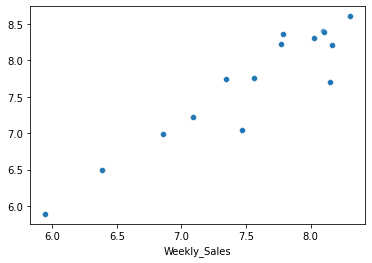

In [29]:
sns.scatterplot(y_test, y_pred)

In [30]:
n_alphas = 150
alphas = np.logspace(-5, 5, n_alphas)

In [31]:
ridge = Ridge()

In [32]:
coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test)**2)])

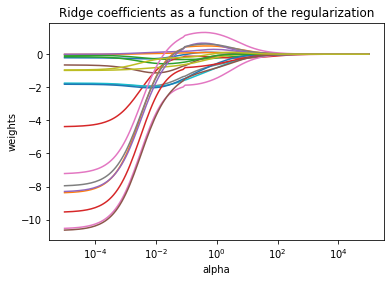

In [33]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

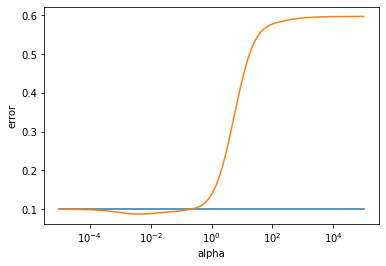

In [34]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [35]:
min(errors)

[0.09959105873366537, 0.08694993742785434]

In [37]:
params = {'alpha': np.arange(0, 2000, 10)}
ridge = Ridge()

grid = GridSearchCV(ridge, params, cv=10, verbose=1)
grid_fit = grid.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [38]:
print("Optimal value for alpha: ", grid_fit.best_params_)

Optimal value for alpha:  {'alpha': 0}


In [39]:
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test, y_test))

Test score for the best model :  0.7840453514879266


In [40]:
scores = cross_val_score(grid_fit.best_estimator_, X_train, y_train, cv=10)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.528159647534663
The standard deviation is :  0.3351668504915579


In [41]:
print(scores)

[ 0.55061435 -0.12184778  0.08826877  0.58917052  0.75500572  0.73588931
  0.86124133  0.18012368  0.7753534   0.86777715]


In [46]:
grid.best_estimator_

Ridge(alpha=0)